# Feed Forward Neural Network

By: Avia Oren & Maya Hayat

#### Classification Task

Classifying the Hebrew letters "ב" "מ" "ל" using the "Feed forward neural network"

### Imports

In [8]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

### Reading data 

In [9]:
ogdata = pd.read_csv('C:/Users/Maya/OneDrive/Desktop/vectors.csv', sep=',')

In [10]:
ogdata

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,1,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,1,1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
629,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
630,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
631,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [11]:
ogdata = ogdata[~ogdata.iloc[:, 1:].apply(lambda row: all(val == -1 for val in row), axis=1)]
ogdata = ogdata[~ogdata.iloc[:, 1:].apply(lambda row: all(val == 1 for val in row), axis=1)]

In [12]:
data = ogdata

In [13]:
data

,1,-1,-1.1,-1.2,-1.3,-1.4,-1.5,-1.6,-1.7,-1.8,...,-1.63,-1.64,-1.65,-1.66,-1.67,-1.68,-1.69,-1.70,-1.71,-1.72
0,1,-1,-1,-1,-1,1,1,1,1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
1,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,1,-1,-1,-1,-1,-1,1,1,-1,-1,...,-1,1,-1,-1,-1,1,1,-1,-1,-1
3,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,-1
629,3,-1,-1,-1,-1,-1,-1,-1,-1,1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1
630,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,1,-1,-1,-1,-1,-1,-1,-1,-1,-1
631,3,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,-1


In [14]:
data = ogdata[ogdata['1'] != 3] #Eliminating "Mem" denoted by 3

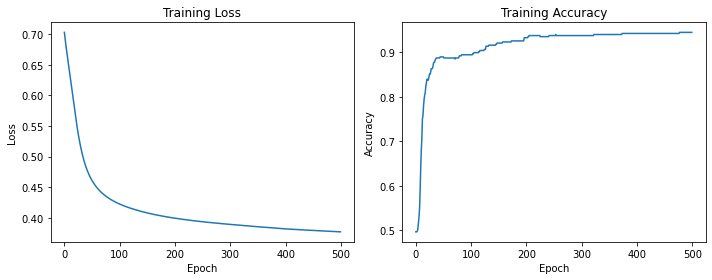

In [15]:
# Extract input and target data
input_data = data.drop(data.columns[0], axis=1).values
target_data = data[data.columns[0]].values

# Encode target values
classes = pd.unique(target_data)
class_to_idx = {classes[i]: i for i in range(len(classes))}
target_data = torch.tensor([class_to_idx[label] for label in target_data], dtype=torch.long)

# Convert the data to PyTorch tensors
input_data = torch.tensor(input_data, dtype=torch.float32)

# Define the neural network architecture
input_size = input_data.shape[1]
hidden_size = 16
output_size = len(classes)

# Create the model
model = nn.Sequential(
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, output_size),
    nn.Softmax(dim=1)
)

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
num_epochs = 500
losses = []
accuracies = []

for epoch in range(num_epochs):
    # Forward pass
    output = model(input_data)
    
    # Compute loss
    loss = criterion(output, target_data)
    losses.append(loss.item())
    
    # Compute accuracy
    _, predicted = torch.max(output, 1)
    correct = (predicted == target_data).sum().item()
    accuracy = correct / len(target_data)
    accuracies.append(accuracy)
    
    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()


torch.save(model.state_dict(), 'model.pth')

# Plot the loss and accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(accuracies)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training Accuracy')

plt.tight_layout()
plt.show()